In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import random

In [57]:
mu, sigma, n = 0, 1, 1000 #define mean, variance and number of observations
x = np.random.normal(mu, sigma, size = (n,)) #generate x based on standard normal distribution
error = np.random.uniform(mu, sigma, size=(n,)) #generate an error term, which is also normally distributed
y =  .3 * x + error #define target as linear function from x

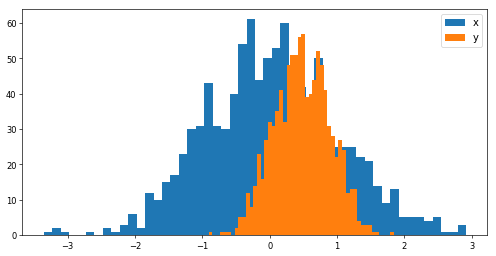

In [171]:
#Plot distribution of x and y
x_list = [x, y]
label_list = ['x', 'y']

plt.figure(num = None, figsize=(10, 5), dpi = 60) #set settings of plot
for i,v in enumerate(x_list):
    plt.hist(v, label = label_list[i], bins = 50) #plot histogram of x
plt.legend(fontsize = 12)    

cor between x and y: 0.72


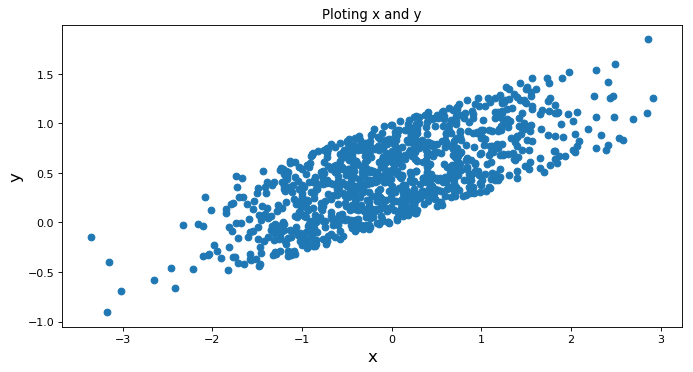

In [90]:
plt.figure(num = None, figsize=(10, 5), dpi = 80) #set settings of plot
plt.scatter(x, y) #plot the data
plt.xlabel('x', fontsize = 15) #xlabel
plt.ylabel('y', fontsize = 15) #ylabel
plt.title('Ploting x and y')
print('cor between x and y:', round(np.corrcoef(x,y)[0][1],2)) #get correlation between x and y

In [166]:
#Now we generate different y predictions and look at our r2:
mean = np.mean(y) 
y_pred_mean = [mean] * n #take mean value of y as prediction
y_pred_random_shuffle = y.copy() #copy y to perform a random shuffle on the variables
random.shuffle(y_pred_random_shuffle) #shuffle y and use this new y as a random prediction
scalling_factor = np.random.uniform(0.1, 1.5, size=(n,)) #defining uniform scalling factors between 0.1 and 1.5
y_pred_scaled = scalling_factor * y #re-scale the target using individual scaling factors for each y_i

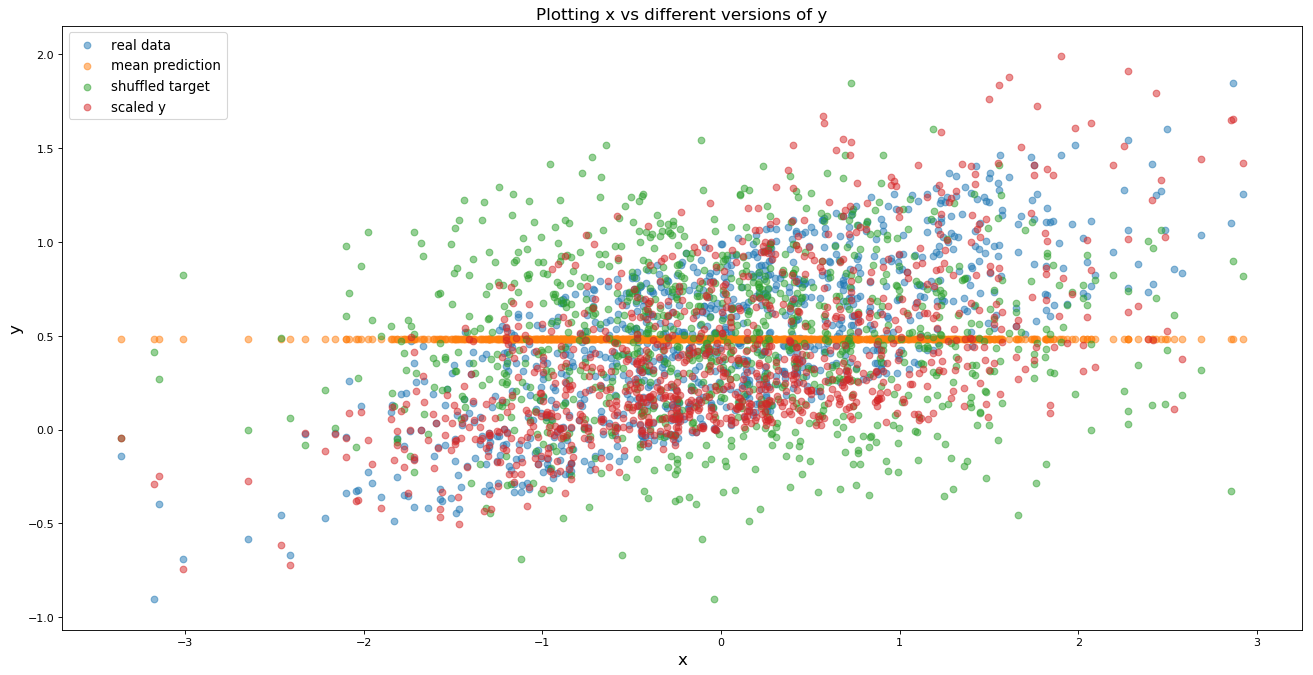

In [170]:
y_list = [y, y_pred_mean, y_pred_random_shuffle, y_pred_scaled]
label_list = ['real data', 'mean prediction', 'shuffled target', 'scaled y']

plt.figure(num = None, figsize=(20, 10), dpi = 80) #set settings of plot

for i,v in enumerate(y_list):
    residual = y - v
    plt.scatter(x, v, alpha = 0.5, label = label_list[i]) #plot the data
    
plt.xlabel('x', fontsize = 15) #xlabel
plt.ylabel('y', fontsize = 15) #ylabel
plt.title('Plotting x vs different versions of y', fontsize = 15)
plt.legend(fontsize = 12)     

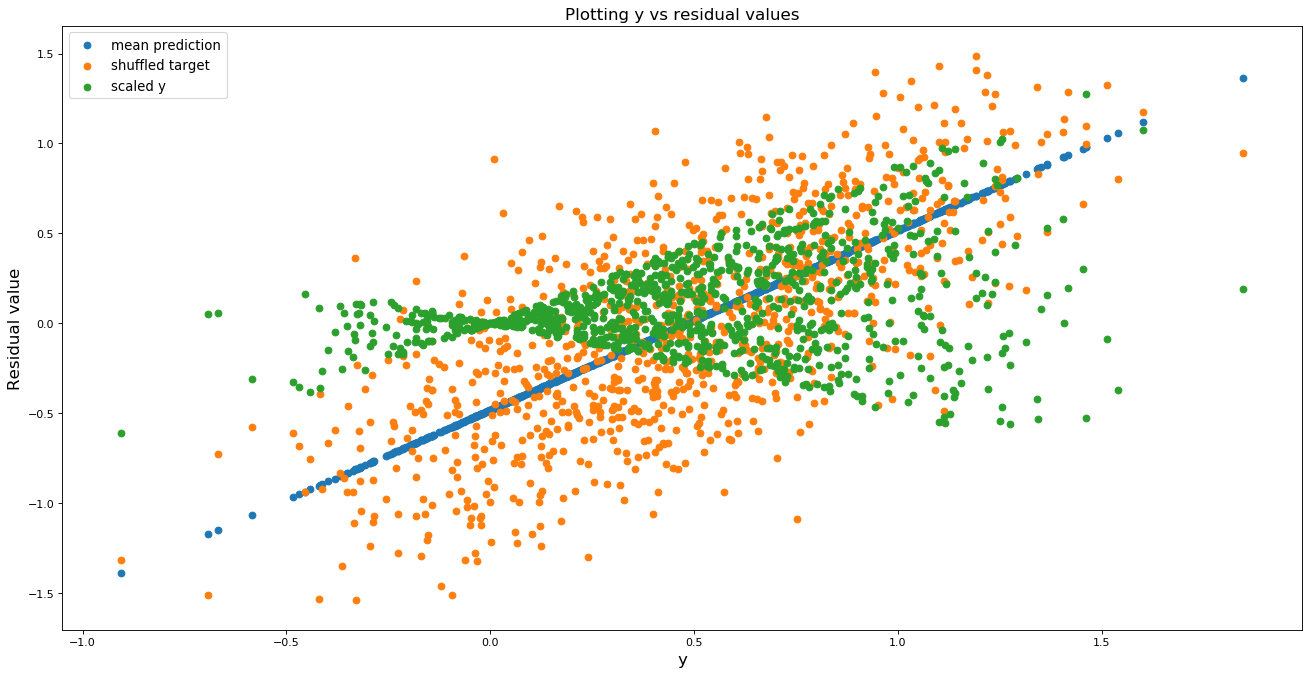

In [168]:
y_list = [y_pred_mean, y_pred_random_shuffle, y_pred_scaled]
label_list = ['mean prediction', 'shuffled target', 'scaled y']

plt.figure(num = None, figsize=(20, 10), dpi = 80) #set settings of plot

for i,v in enumerate(y_list):
    residual = y - v
    plt.scatter(y, residual, label = label_list[i]) #plot the data

plt.xlabel('y', fontsize = 15) #xlabel
plt.ylabel('Residual value', fontsize = 15) #ylabel
plt.title('Plotting y vs residual values', fontsize = 15)
plt.legend(fontsize = 12)      

In [169]:
#Now measure the r2
print('r2 for using the y mean as prediction:', metrics.r2_score(y, y_pred_mean))
print('r2 using a random value from the normal distribution as predictor:', round(metrics.r2_score(y, y_pred_random_shuffle),2))
print('r2 using a random value from the normal distribution as predictor:', round(metrics.r2_score(y, y_pred_scaled),2))

r2 for using the y mean as prediction: 0.0
r2 using a random value from the normal distribution as predictor: -0.95
r2 using a random value from the normal distribution as predictor: 0.52
